# 16.1 텐서플로우를 이용한 필기 숫자 데이터 세트 학습

In [1]:
#p284
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# learn = tf.contrib.learn                                       #TF.Learn을 이용하여 구분자를 훈련!
# mnist = learn.datasets.load_dataset('mnist')                   # mnist 데이터셋 다운로드
train_data, test_data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels) = train_data
(test_images, test_labels) = test_data 

#train_data = mnist.train.images                                # 학습이미지 데이터
#train_labels = np.asarray(mnist.train.labels, dtype=np.int32)  # 학습라벨 데이터
#test_data = mnist.test.images                                  # 테스트 이미지 데이터
#test_labels = np.asarray(mnist.test.labels, dtype=np.int32)    # 테스트 학습 데이터
print(test_labels)

11493376/11490434 [==============================] - 4s 0us/step
[7 2 1 ... 4 5 6]


(28, 28)
(28, 28)
Index 0: Label 7


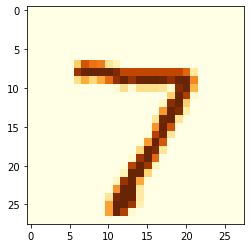

In [2]:
max_examples = 10000


data = train_data[:max_examples]
labels = train_labels[:max_examples]
train_labels = train_labels[:max_examples]
train_images = train_images[:max_examples]
#data_labels = train_labels[-max_examples]
#test_images = test_images[:max_examples]
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis = -1)
#train_data = np.expand_dims(train_images, axis=-1)
#data = np.expand_dims(data, axis = -1)
#train_labels = train_labels[:max_examples]
#test_images = np.expand_dims(train_images, axis=-1)
#train_images = np.expand_dims(train_images, axis=-1)

#test_images = np.expand_dims(train_images, axis=-1)
#print(data.shape)
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
print(train_images[0].shape)
print(test_images[0].shape)
plt.imshow(test_images[0].reshape((28,28)), cmap=plt.cm.YlOrBr)
print('Index %d: Label %d' % (0, test_labels[0]))

In [3]:
#p285
print(test_images[0].shape)

(28, 28)


In [4]:
#p286
print(test_data[0])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

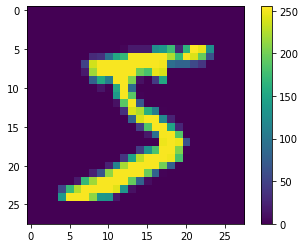

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# 0~1 사이로 조정하여 신경망 모델에 주입하기 위한 전처리
train_images = train_images /255.0
test_images = test_images /255.0

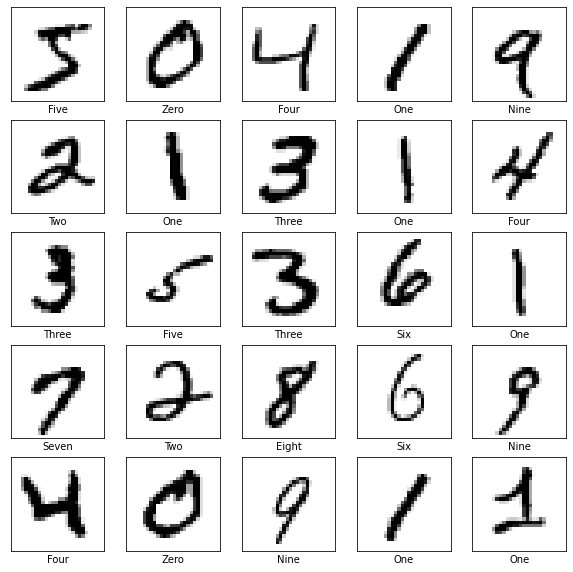

In [9]:
# 첫 25개 이미지와 그 아래 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델구성
### 신경망 모델을 만들기 위해서 모델의 층을 구성한 다음 모델을 컴파일 함.
### Flatten 은 28*28 = 784 인 1차원으로 변환. 두개의 Dense 층이 연속되어 연결됨. 
### 첫번째 Dense 층은 128개의 노드(뉴런)를 가짐. 두번째(마지막 층)은 10개의 softmax 층임
### 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 
### 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함.


In [10]:
from tensorflow import keras
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [12]:
# 모델 훈련
model.fit(train_images, train_labels, epochs = 5)

Train on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 1s 114us/sample - loss: 0.5121 - accuracy: 0.8584
Epoch 2/5
10000/10000 [==============================] - 1s 51us/sample - loss: 0.2393 - accuracy: 0.9340
Epoch 3/5
10000/10000 [==============================] - 0s 49us/sample - loss: 0.1798 - accuracy: 0.9465
Epoch 4/5
10000/10000 [==============================] - 1s 51us/sample - loss: 0.1378 - accuracy: 0.9599
Epoch 5/5
10000/10000 [==============================] - 1s 56us/sample - loss: 0.1079 - accuracy: 0.9698


In [13]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.1882 - accuracy: 0.9417

테스트 정확도: 0.9417


In [14]:
# 예측 만들기
predictions = model.predict(test_images)

In [15]:
# 첫번째 예측 확인. 10개의 숫자배열로 나타남. 10개의 상응하는 모델의 신뢰도를 나타냄
predictions[0]

array([1.6991999e-05, 1.0203120e-07, 3.1040821e-04, 1.7491087e-03,
       4.6290570e-08, 2.0362144e-05, 6.5261679e-10, 9.9779475e-01,
       7.2020248e-06, 1.0095544e-04], dtype=float32)

In [16]:
# 가장 높은 신뢰도를 가진 레이블 찾기
np.argmax(predictions[0])

7

In [17]:
test_labels[0]

7

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]), 
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

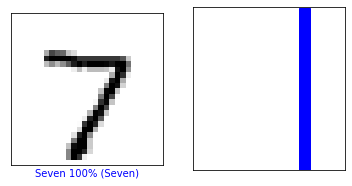

In [19]:
# 0번째, 즉 첫번째 원소의 이미지, 예측 신뢰도 점수 배열
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

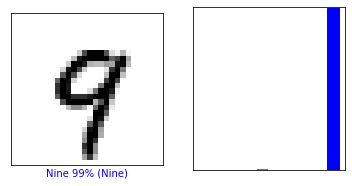

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

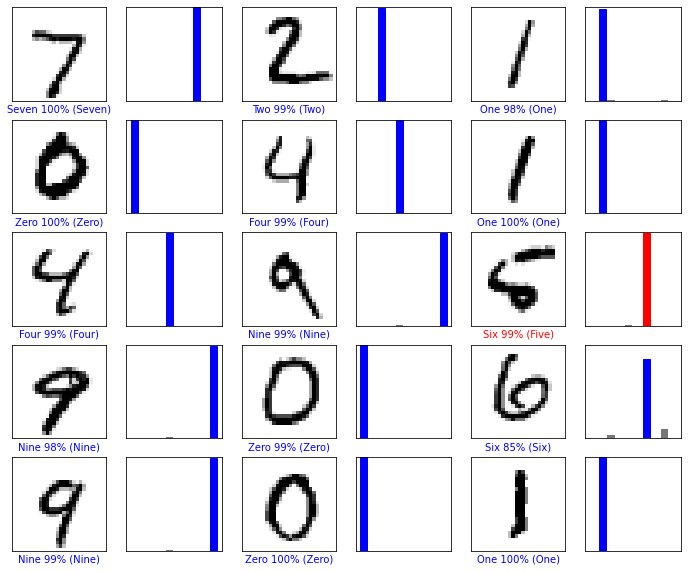

In [21]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [22]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)

(28, 28)


In [23]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
# 이 이미지의 예측을 만듦
predictions_single = model.predict(img)

print(predictions_single)

[[1.6992015e-05 1.0203120e-07 3.1040821e-04 1.7491103e-03 4.6290662e-08
  2.0362162e-05 6.5261679e-10 9.9779475e-01 7.2020321e-06 1.0095544e-04]]


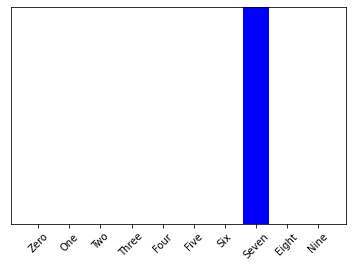

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

7

## 필기 숫자 데이터 세트를 기계학습 모델에 적용

In [27]:
#p289
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#learn = tf.contrib.learn                           # TF.Learn을 이용하여 구분자를 훈련!
#tf.logging.set_verbosity(tf.logging.ERROR)
#mnist = learn.datasets.load_dataset('mnist')                  # mnist 데이터셋 다운로드
#train_data = mnist.train.images                               # 학습이미지 데이터
#train_labels = np.asarray(mnist.train.labels, dtype=np.int32) # 학습라벨 데이터
#test_data = mnist.test.images                                 # 테스트 이미지 데이터
#test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
#train_data, test_data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels) = train_data
(test_images, test_labels) = test_data 
max_examples = 10000
data = train_data[:max_examples]
labels = train_labels[:max_examples]
train_images = train_images[:max_examples]
train_labels = train_labels[:max_examples]
test_images = test_images[:max_examples]
test_labels = test_labels[:max_examples]
print(test_images.shape)
print(test_images[0].shape)


(10000, 28, 28)
(28, 28)


In [28]:
# 0~1 사이로 조정하여 신경망 모델에 주입하기 위한 전처리
train_images = train_images /255.0
test_images = test_images /255.0


In [29]:
#p291
from sklearn import datasets
digits = datasets.load_digits()
print(len(digits.data), len(digits.target))

1797 1797


In [30]:
from sklearn import datasets
digits = datasets.load_digits()
from scipy.spatial import distance
def euc(a,b) :
    return distance.euclidean(a, b)
class eucKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]
clf = eucKNN()
clf.fit(digits.data[:-500], digits.target[:-500])
predictions = clf.predict(digits.data[-500:])
from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target[-500:], predictions))

0.96
